# Modelling Overview

**Learning Objectives:** Get a general conceptual understanding of statistical modelling and machine learning.

## Imports

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.distributions as dist

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1 Introduction

**Modelling**, or **statistical modelling** is a very general approach for using data in a variety of productive ways. In other circles these same ideas go under the name **machine learning** or more trendy phrases such as **machine intelligence**. Some of the slipery terminology comes from the fact that research in this field has been done across different academic disciplines such as statistics, computer science, mathematics and physics. Each field has developed its own emphases and terminologies.

Some of the goals of modelling include:

* Predict future events based on past data.
* Provide intuitive understanding data.
* Provide a mathematical model for data that lacks first principles theoretical models (as in Physics).
* Quantify uncertainties.
* Learn generalizable information from data.

As pointed out by Goodfellow et al., Mitchell (1997) provided a nice general definition of this idea of "learning from data":

> A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E

In this course, we will focus on two different ways of thinking about models:

1. Forward = Generative models
2. Backwards = Inference with models

## 2 Generative models

The idea of a **generative model** is that we can use a model to generate data. Usually, our models will have parameters that we get to (and have to) choose. Here is a diagram that shows show this works:

**Model** $+$ **Parameters** $\rightarrow$ **Generated Data**

Let use this process to model the time between soccer goals in a soccer game. The appropriate distribution for this would be the exponential distribution. Let's say that we know the average time between goals is 20 minutes. Using this parameter and the exponential distribution (our model), we can create a dataset of the time between specific goals (100 of them!) in soccer games:

In [10]:
β = 20 # Parameter
data = np.random.exponential(β, 100) # Model
data # data

array([  5.39240873e+01,   1.05555508e+01,   2.88995260e-02,
         1.89794568e+01,   1.68024801e+01,   1.25907636e+01,
         9.06424753e+00,   4.82657782e+00,   3.39510390e+01,
         2.70586069e+01,   2.43880626e+01,   4.23787988e+00,
         9.23677408e+00,   8.60853449e+00,   6.74527306e+00,
         1.04576054e+01,   4.32001241e+01,   4.16367292e+01,
         1.65179795e+01,   1.93765220e+01,   6.69217199e+00,
         2.39424296e+01,   2.46357161e+01,   3.89095291e+01,
         6.22797334e+00,   3.18852104e+01,   1.11677108e+00,
         3.44853721e+01,   1.98434380e+00,   2.21783819e+00,
         4.07943788e+01,   1.92748343e+01,   4.82192783e-02,
         5.60088905e-01,   1.93946104e+01,   5.73914267e+01,
         1.38368694e+01,   1.34538000e+01,   2.72929693e+01,
         1.19777100e+01,   1.31947484e+01,   5.83882656e+01,
         5.34750599e+01,   1.24114456e+00,   6.40699376e-01,
         2.66181883e+01,   2.27165368e+01,   4.36541429e+00,
         5.23637603e+00,

We can then visualize this dataset:

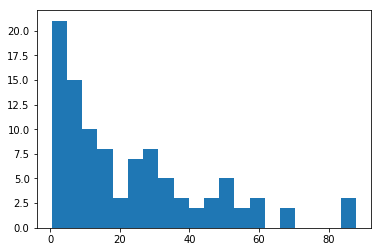

In [9]:
plt.hist(data, bins=20);

This example clarifies the choices that you have to make when building a generative model:

* You have to pick a model to use
* You have to pick the parameters of the model

To assess if you have made good choice, you will have to perform some sort of comparison of the generated data, with actual observations from the system you are intenting to model. In general, you would like to know that the parameters of your model are choosen in a way that makes your model useful. That is exactly what **inference** provides.

## 3 Inference with models

**Inference** is a way of **learning from data**. In the context of generative models, inference allow you to go backwards from **observed data** to parameters that optimize how well the model works for that observed data. Here is a diagram of inference:

**Model** $+$ **Observed Data** + **Training** $\rightarrow$ **Parameters**

Notice the similarities to generative modelling:

* You still have to pick your model!!!

However the differences are most important:

* The data is not generated, it is observed
* The parameters are predicted, rather than guessed
* A **training** step is required.

The magic of inference is that once you have performed inference to find the best parameters, you can turn it around and generate predictions:

**Model** $+$ **Best Parameters** $\rightarrow$ **Predictions**

If your model and parameters are good, you should be able to predict outcomes you haven't seen before.

Let's see how this would work with the above soccer goal data. You have been handed a small dataset of the times (in minutes) between soccer goals. This is your observed data:

In [12]:
observed_data = np.array(
    [  6.57946838,  16.66471659,  52.11420679,  25.64266511,
       10.90558697,  17.74796824,   8.0075313 ,   3.98989899,
       13.46723746,  24.90308858]
)

We are again going to pick the exponential distribution, with a parameter $\beta$. We need to perform some type of inference to find the best value of $\beta$ to use. We will often denote the best parameter with a hat, so let's call the best value $\hat\beta$. There are much more sophisticated way of finding the best parameter, but for now let's find it by just taking the mean of the observed data:

In [19]:
beta_hat = observed_data.mean()

Now that we have the "best" value of beta, we can predict the times between goals of the the *next* 20 goals to happen:

In [20]:
new_data = np.random.exponential(best_parameter, 20)
new_data

array([  1.27645241e+01,   1.43354596e-02,   2.02579393e+01,
         5.06841923e+01,   1.28966413e+00,   9.60994029e+00,
         1.66244125e+01,   1.79772714e+01,   2.45452215e+00,
         4.64922259e-01,   1.31746143e+01,   1.63813670e+01,
         6.74998537e+01,   6.67577194e+01,   1.17592795e+01,
         2.02131761e+00,   4.59984814e+00,   6.91707836e+00,
         7.28352635e+00,   2.79647525e+01])

The obvious question to ask it then this: how did we do. To determine that, we would need to actually observe the next 20 goals and see how their times compare to the generated values. This is a very simple, model so we wouldn't expect the goals to exactly match these predictions, but we might hope that in some aggregate sense our predictions are accurate. In future notebooks, we will go into great detail about assessing how well a model works.